<a href="https://colab.research.google.com/github/Dongsunam/dongsoo/blob/main/POSCO_0621.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Input, Flatten
from keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Conv1D, TimeDistributed, LSTM
from keras.layers import Input
from keras import optimizers

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Sooyeon13/13/main/posco.csv")

x_data = df.drop(['Y'], axis=1)
y_data = df['Y']

T_B=1250
T_D=1210
T_Z=1275

In [3]:
for j in range(0, 200):
  for i in range(len(x_data.loc[j])):
    change=y_data[j]+i+1
    if (change<0):
      change=0

    if (j<50):  
      T=(20-change)*T_B+change*T_D
    
    elif (50<= j <100):
      T=(20-change)*T_D+change*T_B
    
    elif (100<= j <150):
      T=(20-change)*T_B+change*T_Z

    else:
      T=(20-change)*T_Z+change*T_B
    

    if x_data.loc[j][i]=='B':
      T=T/(T_B*20)
      T = round(T, 4)
      T=str(T)
      x_data.loc[j][i] = x_data.loc[j][i].replace('B',T)

    elif x_data.loc[j][i]=='D':
      T=T/(T_D*20)
      T = round(T, 4)
      T=str(T)
      x_data.loc[j][i] = x_data.loc[j][i].replace('D',T)

    elif x_data.loc[j][i]=='Z':
      T=T/(T_Z*20)
      T = round(T, 4)
      T=str(T)
      x_data.loc[j][i] = x_data.loc[j][i].replace('Z',T)

    else:
      x_data.loc[j][i] = x_data.loc[j][i].replace('X','0')


In [4]:
X_train, X_test, y_train, y_test =  train_test_split(x_data, y_data, test_size = 0.1, train_size = 180, random_state = 1)

In [5]:
def split_data(X, y, shift):
  X_split = []
  y_split = []

  for idx in range(shift, len(X)):
    X_split.append(X[idx-shift:idx])
    y_split.append(y[idx].reshape(1))

  X_split = np.array(X_split)
  y_split = np.array(y_split)
 

  return X_split, y_split   

In [6]:
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

X_train_s, y_train_s = split_data(X_train, y_train.reset_index(drop=True), 10)
X_test_s, y_test_s = split_data(X_test, y_test.reset_index(drop=True), 10)

X_train_s = X_train_s.astype(np.float)
X_test_s = X_test_s.astype(np.float)
y_train_s = y_train_s.astype(np.float)
y_test_s = y_test_s.astype(np.float)

X_train_np = X_train_np.astype(np.float)
X_test_np = X_test_np.astype(np.float)
y_train_np = y_train_np.astype(np.float)
y_test_np = y_test_np.astype(np.float)

In [7]:
BATCH_SIZE = 1
EPOCHS = 10
SHIFT = 10
SHUFFLE_BUFFER_SIZE = 100

In [8]:
FFNN_model = Sequential([
                    Flatten(input_shape = (10,20)),
                    Dense(400, activation = 'LeakyReLU'),
                    Dense(200, activation = 'LeakyReLU'),
                    Dense(100, activation = 'LeakyReLU'),
                    Dense(1, activation = 'sigmoid'),
])

FFNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 400)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 180,801
Trainable params: 180,801
Non-trainable params: 0
_________________________________________________________________


In [9]:
FFNN_model.compile(loss='mae', optimizer='adam')

FFNN_history = FFNN_model.fit(X_train_s, y_train_s, shuffle= SHUFFLE_BUFFER_SIZE, batch_size= 1, epochs= 10)

Epoch 1/10
170/170 [==============================] - 14s 2ms/step - loss: 4.6591
Epoch 2/10
170/170 [==============================] - 0s 2ms/step - loss: 4.6473
Epoch 3/10
170/170 [==============================] - 0s 2ms/step - loss: 4.4579
Epoch 4/10
170/170 [==============================] - 0s 2ms/step - loss: 4.5129
Epoch 5/10
170/170 [==============================] - 0s 2ms/step - loss: 4.7011
Epoch 6/10
170/170 [==============================] - 0s 2ms/step - loss: 4.4930
Epoch 7/10
170/170 [==============================] - 0s 2ms/step - loss: 4.4111
Epoch 8/10
170/170 [==============================] - 0s 2ms/step - loss: 4.6077
Epoch 9/10
170/170 [==============================] - 0s 2ms/step - loss: 4.7340
Epoch 10/10
170/170 [==============================] - 0s 2ms/step - loss: 4.3829


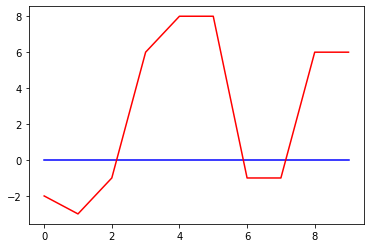

In [10]:
y_predict_FFNN = FFNN_model.predict(X_test_s)
plt.plot(y_predict_FFNN, 'blue')
plt.plot(y_test_s, 'red')

In [11]:
RNN_model = Sequential([   
       LSTM(100, activation= 'tanh',return_sequences=True),
       LSTM(90, activation= 'tanh',return_sequences=True),
       LSTM(80, activation= 'tanh',return_sequences=True),
       LSTM(70, activation= 'tanh',return_sequences=True),
       LSTM(60, activation= 'tanh',return_sequences=True),       
       LSTM(50, activation= 'tanh',return_sequences=True),
       LSTM(40, activation= 'tanh',return_sequences=True),
       LSTM(30, activation= 'tanh',return_sequences=True),
       LSTM(20, activation= 'tanh',return_sequences=True),
       LSTM(10, activation= 'tanh'),
       Dense(1, activation= 'sigmoid')              
])

RNN_model.build((None, 10,20))

RNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 100)           48400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 90)            68760     
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 80)            54720     
_________________________________________________________________
lstm_3 (LSTM)                (None, 10, 70)            42280     
_________________________________________________________________
lstm_4 (LSTM)                (None, 10, 60)            31440     
_________________________________________________________________
lstm_5 (LSTM)                (None, 10, 50)            22200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 10, 40)           

In [12]:
adam = optimizers.Adam(learning_rate= 0.001)
RNN_model.compile(loss='mae', optimizer='adam')

RNN_history = RNN_model.fit(X_train_s, y_train_s, shuffle= SHUFFLE_BUFFER_SIZE, batch_size= BATCH_SIZE, epochs= EPOCHS)

Epoch 1/10
170/170 [==============================] - 22s 28ms/step - loss: 4.5870
Epoch 2/10
170/170 [==============================] - 5s 28ms/step - loss: 4.8319
Epoch 3/10
170/170 [==============================] - 5s 28ms/step - loss: 4.5610
Epoch 4/10
170/170 [==============================] - 5s 28ms/step - loss: 4.5389
Epoch 5/10
170/170 [==============================] - 5s 28ms/step - loss: 4.8283
Epoch 6/10
170/170 [==============================] - 5s 28ms/step - loss: 4.3324
Epoch 7/10
170/170 [==============================] - 5s 28ms/step - loss: 4.9628
Epoch 8/10
170/170 [==============================] - 5s 27ms/step - loss: 4.4076
Epoch 9/10
170/170 [==============================] - 5s 27ms/step - loss: 4.4651
Epoch 10/10
170/170 [==============================] - 5s 28ms/step - loss: 4.5337


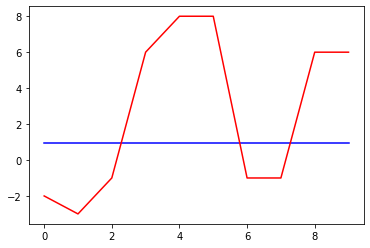

In [13]:
y_predict_RNN = RNN_model.predict(X_test_s)
plt.plot(y_predict_RNN, 'blue')
plt.plot(y_test_s, 'red')

In [14]:
RNN_model_2 = Sequential([
       Conv1D(64, 7, activation='tanh', input_shape=(10, 20),  strides = 1, padding = 'same'),                          
       keras.layers.LSTM(40, activation= 'tanh',return_sequences=True),
       Conv1D(64, 7, activation='tanh', input_shape=(10, 5),  strides = 1, padding = 'same'),
       keras.layers.LSTM(30, activation= 'tanh',return_sequences=True),
       Conv1D(64, 7, activation='tanh', input_shape=(10, 5),  strides = 1, padding = 'same'),
       keras.layers.LSTM(20, activation= 'tanh',return_sequences=True),
       Conv1D(64, 7, activation='tanh', input_shape=(10, 5),  strides = 1, padding = 'same'),
       keras.layers.LSTM(20, activation= 'tanh'),
       Dense(1, activation= 'sigmoid')              
])

RNN_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 10, 64)            9024      
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 10, 40)            16800     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 64)            17984     
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 10, 30)            11400     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 64)            13504     
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 10, 20)            6800      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 64)           

In [15]:
RNN_model_2.compile(loss='mae', optimizer='RMSProp')

RNN_history_2 = RNN_model_2.fit(X_train_s, y_train_s, shuffle= SHUFFLE_BUFFER_SIZE, batch_size= BATCH_SIZE, epochs= EPOCHS)

Epoch 1/10
170/170 [==============================] - 9s 11ms/step - loss: 4.4577
Epoch 2/10
170/170 [==============================] - 2s 12ms/step - loss: 4.4850
Epoch 3/10
170/170 [==============================] - 2s 12ms/step - loss: 4.3626
Epoch 4/10
170/170 [==============================] - 2s 12ms/step - loss: 4.3788
Epoch 5/10
170/170 [==============================] - 2s 12ms/step - loss: 4.4572
Epoch 6/10
170/170 [==============================] - 2s 12ms/step - loss: 4.6727
Epoch 7/10
170/170 [==============================] - 2s 12ms/step - loss: 4.5164
Epoch 8/10
170/170 [==============================] - 2s 12ms/step - loss: 4.3751
Epoch 9/10
170/170 [==============================] - 2s 12ms/step - loss: 4.6704
Epoch 10/10
170/170 [==============================] - 2s 12ms/step - loss: 4.5394


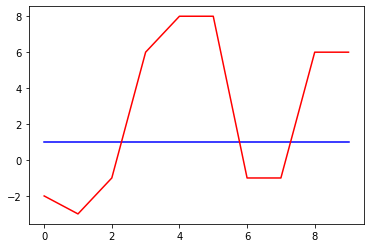

In [16]:
y_predict_RNN_2 = RNN_model_2.predict(X_test_s)
plt.plot(y_predict_RNN_2, 'blue')
plt.plot(y_test_s, 'red')

In [17]:
scoring = 'accuracy'

In [18]:
clf_k = KNeighborsClassifier(n_neighbors= 13)
score_k = cross_val_score(clf_k, X_train_np, y_train_np, cv = k_fold, n_jobs = 1, scoring = scoring)
round(np.mean(score_k)*100, 2)

16.67

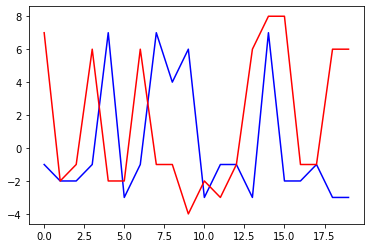

In [19]:
clf_k.fit(X_train_np, y_train_np)

y_predict_k = clf_k.predict(X_test_np)

plt.plot(y_predict_k, 'blue')
plt.plot(y_test_np, 'red')

In [20]:
clf_d = DecisionTreeClassifier()
score_d = cross_val_score(clf_d, X_train_np, y_train_np, cv = k_fold, n_jobs = 1, scoring = scoring)
round(np.mean(score_d)*100, 2)

91.67

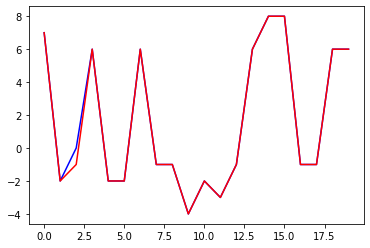

In [21]:
clf_d.fit(X_train_np, y_train_np)

y_predict_d = clf_d.predict(X_test_np)

plt.plot(y_predict_d, 'blue')
plt.plot(y_test_np, 'red')

In [24]:
clf_r = RandomForestClassifier(n_estimators= 13)
score_r = cross_val_score(clf_r, X_train_np, y_train_np, cv = k_fold, n_jobs = 1, scoring = scoring)
round(np.mean(score_r)*100, 2)

93.33

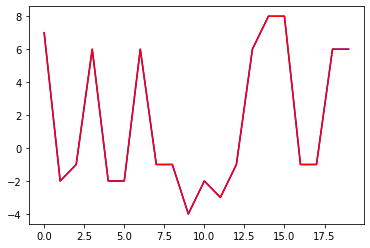

In [25]:
clf_r.fit(X_train_np, y_train_np)

y_predict_r = clf_r.predict(X_test_np)

plt.plot(y_predict_r, 'blue')
plt.plot(y_test_np, 'red')

In [26]:
clf_g = GaussianNB()
score_g = cross_val_score(clf_g, X_train_np, y_train_np, cv = k_fold, n_jobs = 1, scoring = scoring)
round(np.mean(score_g)*100, 2)

36.67

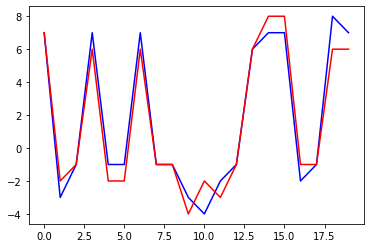

In [27]:
clf_g.fit(X_train_np, y_train_np)

y_predict_g = clf_g.predict(X_test_np)

plt.plot(y_predict_g, 'blue')
plt.plot(y_test_np, 'red')

In [28]:
clf_s = SVC()
score_s = cross_val_score(clf_s, X_train_np, y_train_np, cv = k_fold, n_jobs = 1, scoring = scoring)
round(np.mean(score_s)*100, 2)

20.0

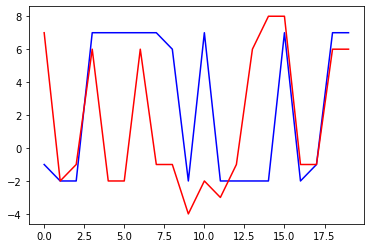

In [29]:
clf_s.fit(X_train_np, y_train_np)

y_predict_s = clf_s.predict(X_test_np)

plt.plot(y_predict_s, 'blue')
plt.plot(y_test_np, 'red')